<a href="https://colab.research.google.com/github/raLITsa13/awesome-app-ideas/blob/master/DL_PROJECT_GROUP_!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3182 - loss: 1.1092 - val_accuracy: 0.3173 - val_loss: 1.1012
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3393 - loss: 1.0995 - val_accuracy: 0.3213 - val_loss: 1.0995
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3515 - loss: 1.0994 - val_accuracy: 0.3293 - val_loss: 1.0999
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3606 - loss: 1.0974 - val_accuracy: 0.3173 - val_loss: 1.1023
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3504 - loss: 1.0977 - val_accuracy: 0.3413 - val_loss: 1.1008
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3739 - loss: 1.0960 - val_accuracy: 0.3480 - val_loss: 1.1014
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3488 - loss: 1.0951 - val_accuracy: 0.3307 - val_loss: 1.1011
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3727 - loss: 1.0907 - val_accuracy: 0.

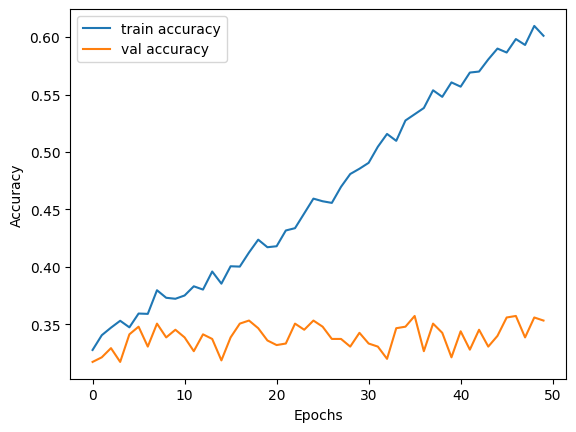

In [ ]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# Step 2: Load Dataset
# Assuming dataset.csv contains the data from 2014 to 2024
data = pd.read_csv('soil_samples.csv')

# Step 3: Preprocessing
# Handling missing values (if any)

# Calculate the mean of only numeric columns
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Separating features and target
X = data.drop('soil_health_category', axis=1).values  # Features (15 parameters)
y = data['soil_health_category'].values               # Target ('Good', 'Moderate', 'Poor')

# Normalizing the data (Min-Max scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the target (assuming the soil health categories are strings)
y_encoded = pd.get_dummies(y).values  # Convert to one-hot encoding

# Splitting the data into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Step 4: Define CNN Model Architecture
model = Sequential()

# 1D Convolutional layer (since we are dealing with tabular data)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (3 nodes for 3 categories of soil health)
model.add(Dense(3, activation='softmax'))

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshaping input data for Conv1D
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)

# Step 6: Train the Model
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_reshaped, y_val))

# Step 7: Evaluate the Model
X_test_reshaped = np.expand_dims(X_test, axis=-1)
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 8: Generate Classification Report
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=['Good', 'Moderate', 'Poor']))

# Optional: Plot Training and Validation Accuracy and Loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3376 - loss: 1.1043 - val_accuracy: 0.3147 - val_loss: 1.1000
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3292 - loss: 1.1031 - val_accuracy: 0.3680 - val_loss: 1.0987
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3537 - loss: 1.0984 - val_accuracy: 0.3280 - val_loss: 1.0998
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3459 - loss: 1.0976 - val_accuracy: 0.3467 - val_loss: 1.0986
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3448 - loss: 1.0978 - val_accuracy: 0.3360 - val_loss: 1.1005
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3635 - loss: 1.0960 - val_accuracy: 0.3520 - val_loss: 1.1000
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3634 - loss: 1.0962 - val_accuracy: 0.3507 - val_loss: 1.1000
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3548 - loss: 1.0951 - val_accuracy: 0.

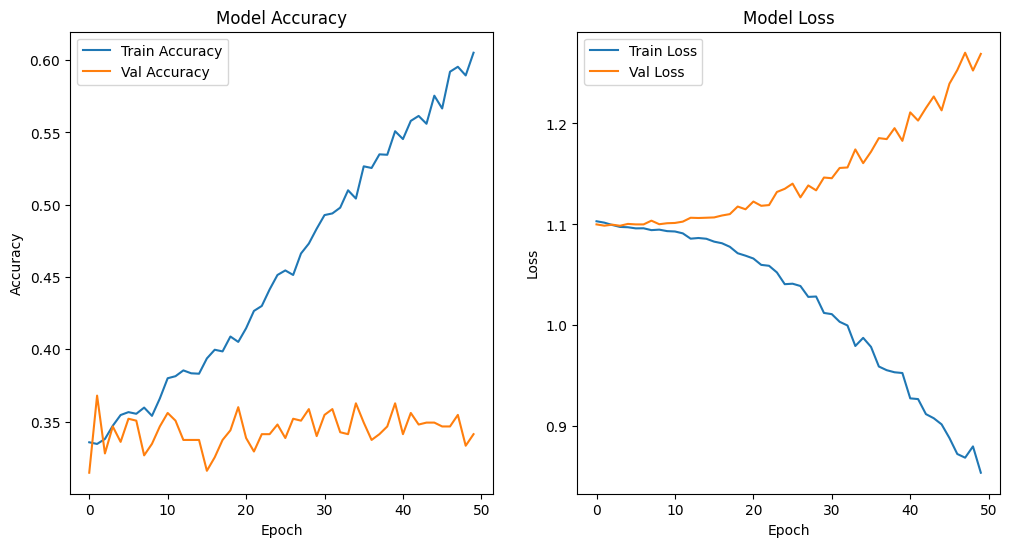

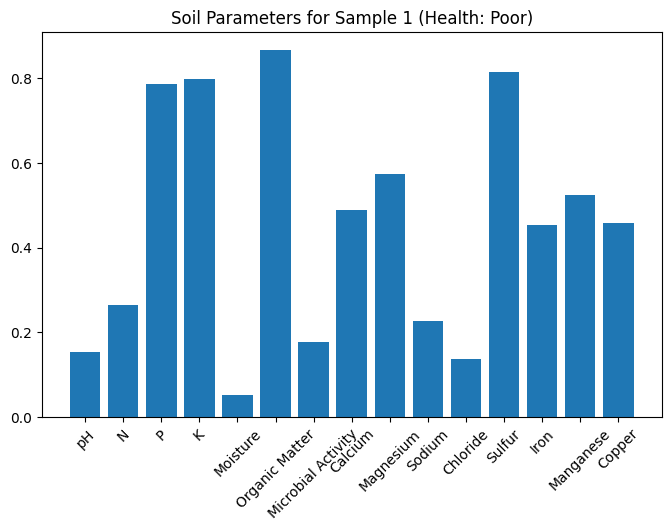

In [ ]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 2: Load Dataset
data = pd.read_csv('soil_samples.csv')

# Step 3: Preprocessing
# Calculate the mean of only numeric columns
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())
# The original line: data = data.fillna(data.mean())
# was replaced with the lines above to only calculate
# the mean of numeric columns and fill NaNs in those columns.


# Separating features and target
X = data.drop('soil_health_category', axis=1).values  # Features (15 parameters)
y = data['soil_health_category'].values               # Target ('Good', 'Moderate', 'Poor')

# Normalizing the data (Min-Max scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the target
y_encoded = pd.get_dummies(y).values  # One-hot encoding

# Splitting data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Reshape input for Conv1D
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Step 4: CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_reshaped, y_val))

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Classification Report
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=['Good', 'Moderate', 'Poor']))

# Step 8: Plotting Accuracy and Loss Graphs

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Optional: Example Input Visualization (Soil Parameter Distribution)
# Visualizing the first sample from the test set as an example of the soil parameters

sample_index = 0
sample_features = X_test[sample_index]
soil_health = np.argmax(y_test[sample_index])

# Plot the feature values for a single soil sample
plt.figure(figsize=(8, 5))
plt.bar(range(1, 16), sample_features, tick_label=[
    'pH', 'N', 'P', 'K', 'Moisture', 'Organic Matter', 'Microbial Activity',
    'Calcium', 'Magnesium', 'Sodium', 'Chloride', 'Sulfur', 'Iron',
    'Manganese', 'Copper'])
plt.title(f'Soil Parameters for Sample {sample_index + 1} (Health: {["Good", "Moderate", "Poor"][soil_health]})')
plt.xticks(rotation=45)
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.3327 - loss: 2.6023 - val_accuracy: 0.3127 - val_loss: 2.0376 - learning_rate: 1.0000e-04
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3374 - loss: 2.3566 - val_accuracy: 0.3127 - val_loss: 2.0387 - learning_rate: 1.0000e-04
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3559 - loss: 2.2438 - val_accuracy: 0.3166 - val_loss: 2.0377 - learning_rate: 1.0000e-04
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3659 - loss: 2.1844 - val_accuracy: 0.3100 - val_loss: 2.0312 - learning_rate: 1.0000e-04
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3899 - loss: 2.1001 - val_accuracy: 0.3008 - val_loss: 2.0236 - learning_rate: 1.0000e-04
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3764 - loss: 2.0834 - val_accuracy: 0.3245 - val_loss: 2.0199 - learning_rate: 1.0000e-04
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3788 - loss: 2

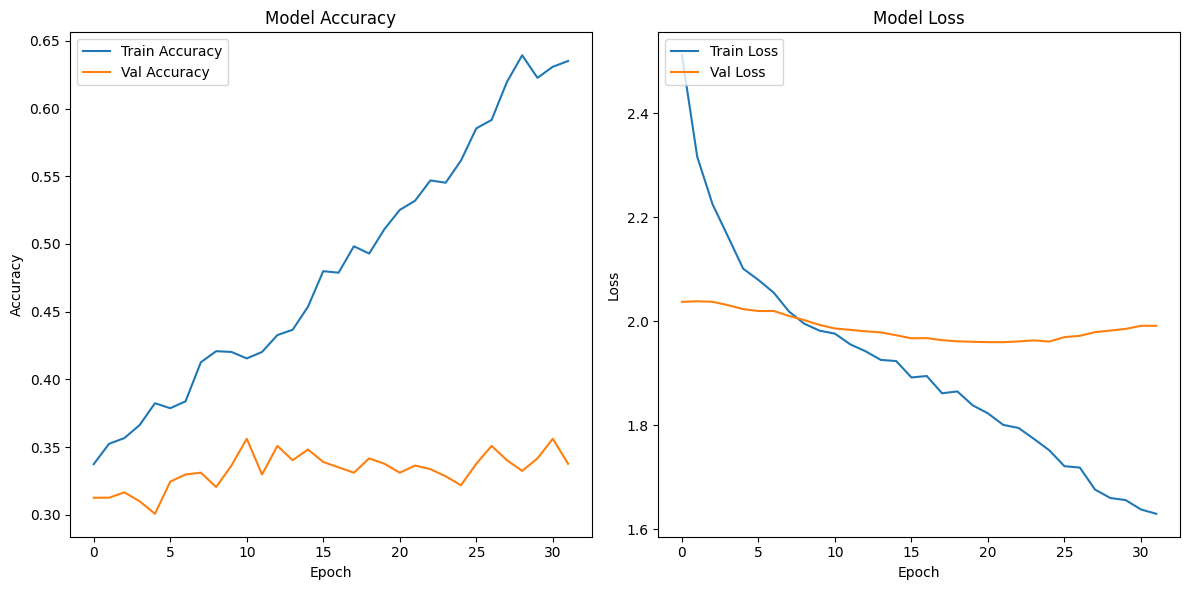

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset (provide correct path)
data = pd.read_csv('soil_samples.csv')

# Checking for missing values and filling them
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Encoding the target variable 'soil_health_category' using one-hot encoding
y = pd.get_dummies(data['soil_health_category']).values  # One-hot encoding the target

# Separating the features (dropping the target column)
X = data.drop('soil_health_category', axis=1).values

# Balancing the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_resampled, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Reshaping input data for CNN
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Building the CNN Model
model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                 input_shape=(X_train.shape[1], 1),  # Input shape is correct
                 padding='same',  # Use 'same' padding to keep the output size consistent
                 kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu',
                 padding='same',  # Use 'same' padding
                 kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Third convolutional layer - Adjust kernel size or remove this layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu',
                 padding='same',  # Use 'same' padding
                 kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
# Consider reducing pooling or removing this MaxPooling layer
# if your input sequence length is not very long
model.add(MaxPooling1D(pool_size=2))

# ... (rest of your model code)

# Flattening the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))

# Output layer (3 categories: Poor, Moderate, Good)
model.add(Dense(3, activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the model
history = model.fit(X_train_reshaped, y_train,
                    epochs=200,
                    batch_size=64,
                    validation_data=(X_val_reshaped, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification Report
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=['Poor', 'Moderate', 'Good']))

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.3229 - loss: 1.8417 - val_accuracy: 0.3391 - val_loss: 1.1040 - learning_rate: 1.0000e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3429 - loss: 1.5770 - val_accuracy: 0.3417 - val_loss: 1.1168 - learning_rate: 1.0000e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3682 - loss: 1.3920 - val_accuracy: 0.3430 - val_loss: 1.1437 - learning_rate: 1.0000e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3655 - loss: 1.3668 - val_accuracy: 0.3456 - val_loss: 1.1550 - learning_rate: 1.0000e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3618 - loss: 1.2956 - val_accuracy: 0.3298 - val_loss: 1.1645 - learning_rate: 1.0000e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3891 - loss: 1.2362 - val_accuracy: 0.3364 - val_loss: 1.1704 - learning_rate: 1.0000e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3905 - loss: 1.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


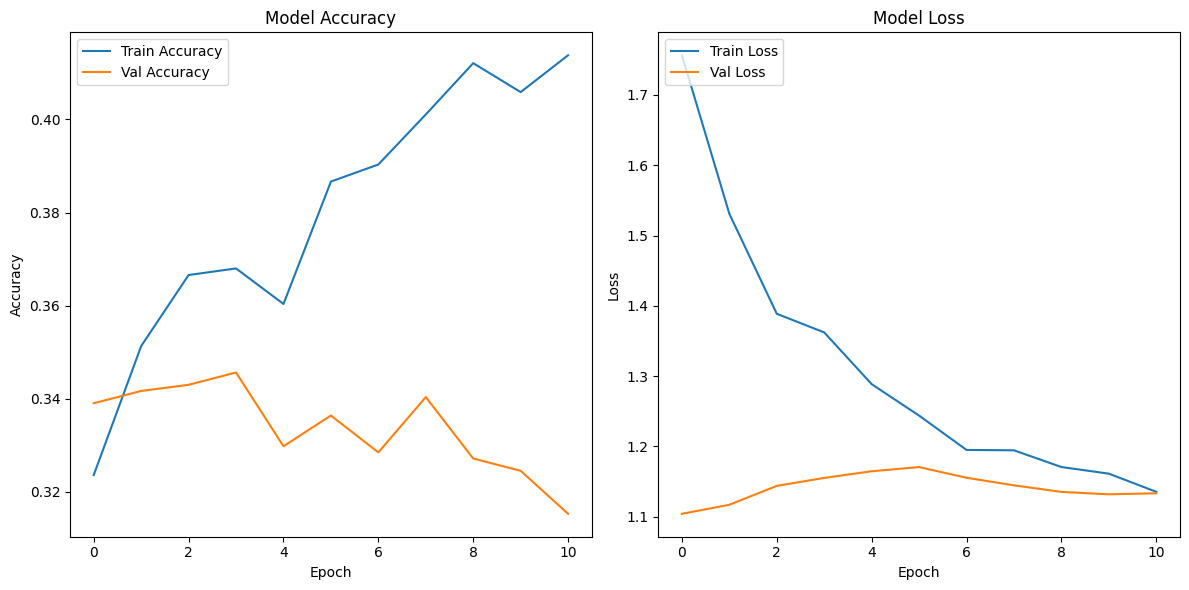

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset (provide correct path)
data = pd.read_csv('soil_samples.csv')

# Checking for missing values and filling them
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Encoding the target variable 'soil_health_category' using one-hot encoding
y = pd.get_dummies(data['soil_health_category']).values  # One-hot encoding the target

# Separating the features (dropping the target column)
X = data.drop('soil_health_category', axis=1).values

# Balancing the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_resampled, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Reshaping input data for CNN
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Building the CNN Model
model = Sequential()

# First convolutional layer with 'same' padding to maintain the input shape
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (3 categories: Poor, Moderate, Good)
model.add(Dense(3, activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the model
history = model.fit(X_train_reshaped, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_val_reshaped, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification Report
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=['Poor', 'Moderate', 'Good']))

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.3487 - loss: 1.5239 - val_accuracy: 0.3192 - val_loss: 1.1306 - learning_rate: 0.0010
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3858 - loss: 1.1468 - val_accuracy: 0.3205 - val_loss: 1.1646 - learning_rate: 0.0010
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4080 - loss: 1.1019 - val_accuracy: 0.3258 - val_loss: 1.2242 - learning_rate: 0.0010
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4086 - loss: 1.0805 - val_accuracy: 0.3258 - val_loss: 1.1569 - learning_rate: 0.0010
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4207 - loss: 1.0719 - val_accuracy: 0.3351 - val_loss: 1.1293 - learning_rate: 0.0010
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4207 - loss: 1.0614 - val_accuracy: 0.3629 - val_loss: 1.1260 - learning_rate: 0.0010
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4505 - loss: 1.0566 

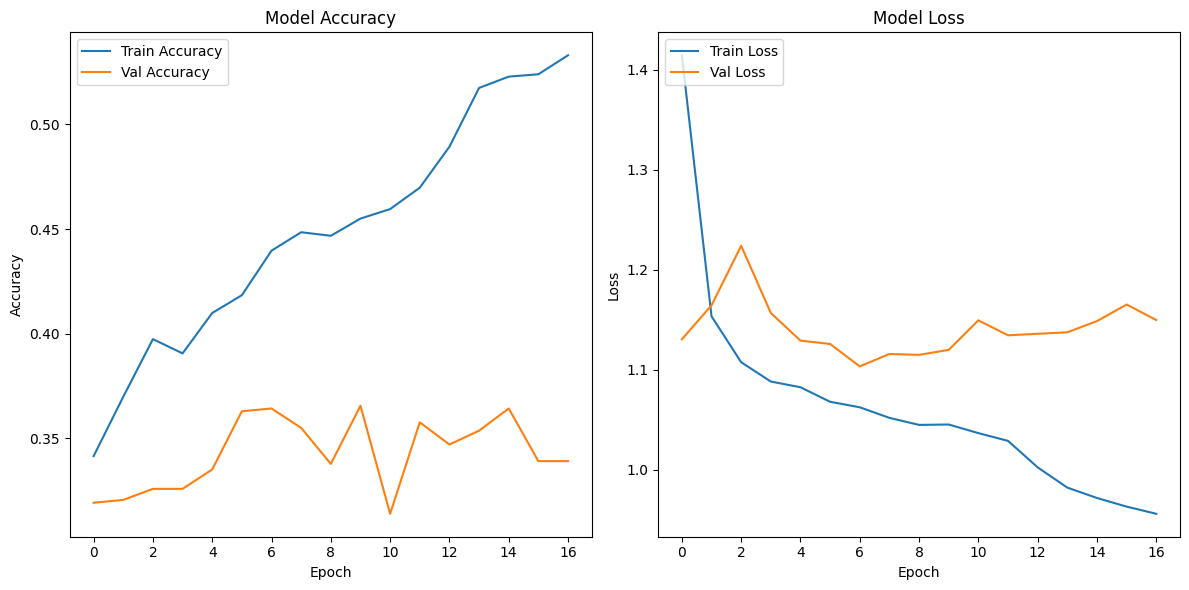

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

data = {
    'pH': np.random.uniform(4.5, 7.5, 5000),
    'Nitrogen': np.random.uniform(20, 60, 5000),
    'Phosphorus': np.random.uniform(15, 45, 5000),
    'Potassium': np.random.uniform(10, 50, 5000),
    'Moisture_Content': np.random.uniform(5, 30, 5000),
    'Organic_Matter': np.random.uniform(1, 10, 5000),
    'Microbial_Activity': np.random.uniform(1, 5, 5000),
    'Calcium': np.random.uniform(0.5, 5, 5000),
    'Magnesium': np.random.uniform(0.3, 2.5, 5000),
    'Sodium': np.random.uniform(0.5, 3, 5000),
    'Chloride': np.random.uniform(0.3, 1.5, 5000),
    'Sulfur': np.random.uniform(0.5, 4, 5000),
    'Iron': np.random.uniform(1, 5, 5000),
    'Manganese': np.random.uniform(0.2, 1.5, 5000),
    'Copper': np.random.uniform(0.05, 0.5, 5000),
    'soil_health_category': np.random.choice(['Poor', 'Moderate', 'Good'], 5000)
}


# ... (previous code)

# Create a Pandas DataFrame from the data dictionary
data = pd.DataFrame(data)

# 2. Data Cleaning: Handle missing values with mean imputation
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# ... (rest of your code)

# 3. Normalization: Min-Max Scaling
scaler = MinMaxScaler()
X = data.drop('soil_health_category', axis=1).values
X_scaled = scaler.fit_transform(X)

# 4. Encode the target variable
y = pd.get_dummies(data['soil_health_category']).values  # One-hot encoding the target

# 5. Feature Selection: Using RFE with RandomForest to rank feature importance
# We'll use RandomForest as a baseline model for feature ranking
model_rf = RandomForestClassifier(random_state=42)
rfe = RFE(model_rf, n_features_to_select=10)  # Select top 10 features
X_selected = rfe.fit_transform(X_scaled, y.argmax(axis=1))  # Use the best features

# 6. Feature Extraction: Principal Component Analysis (PCA)
# Apply PCA to reduce dimensions further
pca = PCA(n_components=8)  # Let's reduce to 8 principal components
X_pca = pca.fit_transform(X_selected)

# 7. Data Balancing: Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# 8. Splitting data into training, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 9. Reshape the input data for CNN
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# 10. CNN Model Architecture
model = Sequential()

# Input layer and 1st convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# 2nd convolutional layer
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Dense layers with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(3, activation='softmax'))  # 3 classes: Poor, Moderate, Good

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_reshaped, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Cross-Validation with K-Fold (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc = []

for train_index, val_index in kf.split(X_resampled):
    X_train_kfold, X_val_kfold = X_resampled[train_index], X_resampled[val_index]
    y_train_kfold, y_val_kfold = y_resampled[train_index], y_resampled[val_index]

    # Reshape for CNN
    X_train_kfold_reshaped = np.expand_dims(X_train_kfold, axis=-1)
    X_val_kfold_reshaped = np.expand_dims(X_val_kfold, axis=-1)

    # Train the model with each fold
    model.fit(X_train_kfold_reshaped, y_train_kfold,
              epochs=50,
              batch_size=32,
              validation_data=(X_val_kfold_reshaped, y_val_kfold),
              callbacks=[early_stopping, reduce_lr])

    # Evaluate fold accuracy
    _, fold_acc = model.evaluate(X_val_kfold_reshaped, y_val_kfold)
    cross_val_acc.append(fold_acc)

# Average cross-validation accuracy
avg_cross_val_acc = np.mean(cross_val_acc)
print(f"Average Cross-Validation Accuracy: {avg_cross_val_acc * 100:.2f}%")

# Generate Classification Report
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=['Poor', 'Moderate', 'Good']))

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.3358 - loss: 1.6609 - val_accuracy: 0.3453 - val_loss: 2.5389 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3746 - loss: 1.0959 - val_accuracy: 0.3453 - val_loss: 3.2966 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3993 - loss: 1.0821 - val_accuracy: 0.3453 - val_loss: 3.8263 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4069 - loss: 1.0772 - val_accuracy: 0.3533 - val_loss: 2.6400 - learning_rate: 0.0010
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4248 - loss: 1.0651 - val_accuracy: 0.3653 - val_loss: 1.2059 - learning_rate: 0.0010
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4490 - loss: 1.0410 - val_accuracy: 0.3467 - val_loss: 1.1317 - learning_rate: 0.0010
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4943 - loss: 1.0038

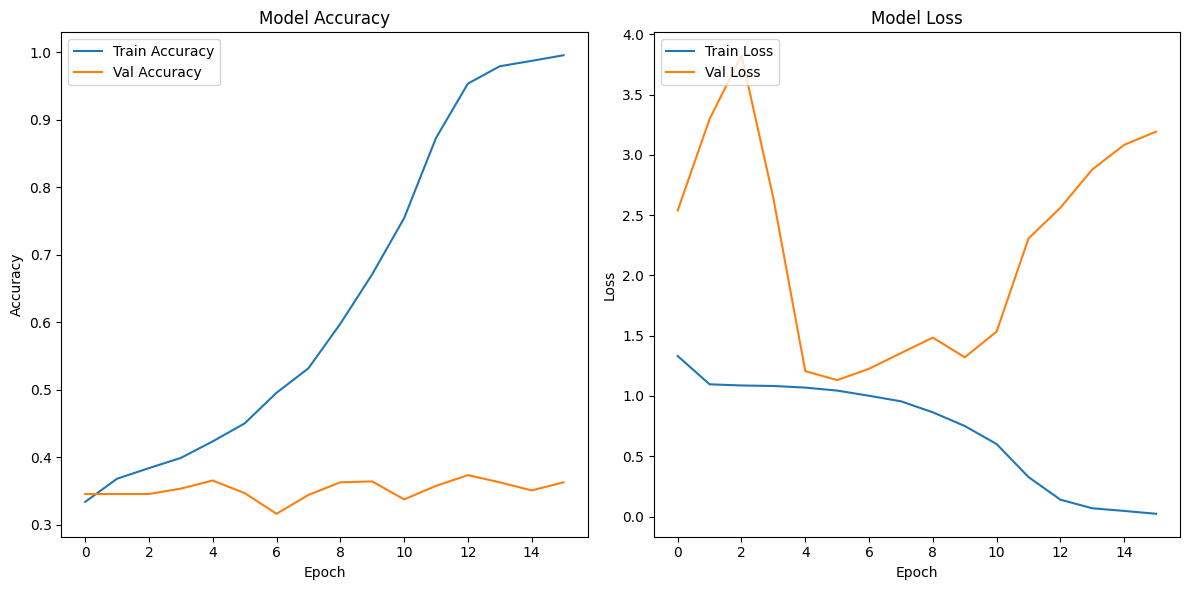

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Generate Random Image Data (Grayscale Images)
num_samples = 5000  # Number of samples
img_height, img_width = 28, 28  # Image dimensions (like a 28x28 grayscale image)
num_classes = 3  # Classes: 'Poor', 'Moderate', 'Good'

# Generate random grayscale image data (values between 0 and 255 for grayscale)
X_images = np.random.randint(0, 256, (num_samples, img_height, img_width, 1)).astype('float32') / 255.0  # Normalizing pixel values

# Generate random labels for soil health (Poor = 0, Moderate = 1, Good = 2)
y_labels = np.random.choice([0, 1, 2], num_samples)

# One-hot encode the labels for classification
y = to_categorical(y_labels, num_classes)

# 2. Split the data into train, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_images, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 3. CNN Model Architecture for Image Classification
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer for 3 classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# 4. Train the Model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# 5. Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 6. Generate Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=['Poor', 'Moderate', 'Good']))

# 7. Plot the Accuracy and Loss Curves
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
